# A comparison of expected 10k cohort thrombolysis rates across hospitals: subgroup analysis

## Plain English summary

We can predict the use of thrombolysis across hospitals if all hospital saw the same 10 thousand patients. 

We can also look at subgroups of those patients, representing, for example, an 'ideal' thrombolysis candidates, or some 'sub-optimal' candidates.

Informed by the SHAP values, we defined subgroups of patients: one ‘ideally’ thrombolysable patient, nine ‘sub-optimal’ thrombolysable patient subgroups (one subgroup per feature), and subgroups with combinations of sub-optimal features. We based the ideally thrombolysable definition on observing the relationships between feature values and thrombolysis use, and for each ‘sub optimal’ subgroup we chose the feature value that is less desirable for choosing to use thrombolysis (this is either a feature value that corresponds with a SHAP value of zero, or the least favourable value for binary features). 

The patient subgroups are defined as:
  * An *ideal* thrombolysable patient:
    * Stroke severity NIHSS in range 10-25
    * Arrival-to-scan time < 30 minutes
    * Stroke type = infarction
    * Precise onset time = True
    * Prior diability level (mRS) = 0
    * No use of AF anticoagulants
    * Onset-to-arrival time < 90 minutes
    * Age < 80 years
    * Onset during sleep = False
  * Mild stroke severity (NIHSS < 5)
  * No precise onset time
  * Existing pre-stroke disability (mRS > 2)
  * Older than 80 years old
  * A haemorrhagic stroke
  * Arrival-to-scan time 60-90 minutes
  * Onset-to-arrival time 150-180 minutes
  * Use of AF anticoagulants
  * Onset during sleep


We analysed the observed and predicted use of thrombolysis in each of these subgroups of patients.

All stroke units show high expected thrombolysis in a set of 'ideal' thrombolysis patients, but vary in expected use in subgroups with low stroke severity, no precise onset time, or existing pre-stroke disability. If a stroke unit showed lower  thombolysis in one of these subgroups they also tended to show lower thrombolysis rates in the other subgroups - suggesting a shared caution in use of thrombolysis in 'less ideal' patients.

## Model and data

Using the XGBoost model that is trained on all but a 10k patient cohort (from notebook 04) to predict which patient will recieve thrombolysis. The XGBoost model is fitted to all but 10k instances, and uses 10 features: 

* Arrival-to-scan time: Time from arrival at hospital to scan (mins)
* Infarction: Stroke type (1 = infarction, 0 = haemorrhage)
* Stroke severity: Stroke severity (NIHSS) on arrival
* Precise onset time: Onset time type (1 = precise, 0 = best estimate)
* Prior disability level: Disability level (modified Rankin Scale) before stroke
* Stroke team: Stroke team attended
* Use of AF anticoagulents: Use of atrial fibrillation anticoagulant (1 = Yes, 0 = No)
* Onset-to-arrival time: Time from onset of stroke to arrival at hospital (mins)
* Onset during sleep: Did stroke occur in sleep?
* Age: Age (as middle of 5 year age bands)

And one target feature:
* Thrombolysis: Recieve thrombolysis (1 = Yes, 0 = No)

The 10 features included in the model (to predict whether a patient will recieve thrombolysis) were chosen sequentially as having the single best improvement in model performance (using the ROC AUC). The stroke team feature is included as a one-hot encoded feature.

The 10k patient cohort is used here to send a common set of patients to each hospital in turn to obtain a thrombolysis rate that is comparable across hospitals which has any patient factors removed.

## Aims:

* Use the XGBoost model trained on all data except for a 10k set of patients to predict use of thrombolysis in the heldback 10k cohort of patients, at each of the 132 hospitals (by changing hospital one-hot coding).
* Predict use of thrombolysis in subgroups of patients, defined by:
  * An *ideal* thrombolysable patient:
    * Stroke severity NIHSS in range 10-25
    * Arrival-to-scan time < 30 minutes
    * Stroke type = infarction
    * Precise onset time = True
    * Prior diability level (mRS) = 0
    * No use of AF anticoagulants
    * Onset-to-arrival time < 90 minutes
    * Age < 80 years
    * Onset during sleep = False
  * Mild stroke severity (NIHSS < 5)
  * No precise onset time
  * Existing pre-stroke disability (mRS > 2)
  * Older than 80 years old
  * A haemorrhagic stroke
  * Arrival-to-scan time 60-90 minutes
  * Onset-to-arrival time 150-180 minutes
  * Use of AF anticoagulants
  * Onset during sleep

## Observations

* The 10k cohort may be grouped to show thrombolysis in particular groups

* Those hospitals with lower thrombolysis use, compared with their total thrombolysis use, in the subsets of patients (NIHSS < 5, mRS >2, no precise onset time) tend to have signficantly lower overall thrombolysis use in the full 10k patients.

* When testing the 'ideal' thrombolysable patients, 95% of hospitals would be expected to give thrombolysis to at least 99% of patients. 

* The range of thrombolysis use across hospitals in the other subgroups was as follows:
  * All 10k patients: minimum = 10%, median = 28%, maxiumum = 45%
  * NIHSS <5: minimum = 0%, median = 6%, maxiumum = 25%
  * No precise onset time: minimum = 0%, median = 7%, maxiumum = 20%
  * Prestroke mRS >2: minimum = 0%, median = 11%, maxiumum = 38%
  * Age > 80: minimum = 6%, median = 22%, maxiumum = 44%
  * Arrival-to-scan 60-90mins: minimum = 0%, median = 6%, maxiumum = 21%
  * Haemorrhagic: minimum = 0%, median = 0%, maxiumum = 0%
  * Used AF anticoagulants: minimum = 0%, median = 2%, maxiumum = 24%
  * Onset-to-arrival time 150-180mins: minimum = 3%, median = 19%, maxiumum = 37%
  * Onset during sleep: minimum = 0%, median = 0%, maxiumum = 13%
  * NIHSS + Precise: minimum = 0%, median = 0%, maxiumum = 6%
  * NIHSS + Disability: minimum = 0%, median = 0%, maxiumum = 13%
  * Precise + Disability: minimum = 0%, median = 1%, maxiumum = 16%
  * NIHSS + Precise + Disability: minimum = 0%, median = 0%, maxiumum = 3%

* The three subgroups of NIHSS <5, no precise stroke onset time, and prestroke mRS > 2, showed quite high pairwise correlations (r-squared 0.45 to 0.62). The three subgorups also showed quite strong correlation with the expected thrombolysis rate across all 10k patients (r-squared 0.68 to 0.77)

* Almost all stroke units show high expected thrombolysis in a set of 'ideal' thrombolysis patients, but vary in expected use in subgroups with low stroke severity, no precise onset time, or existing pre-stroke disability. If a stroke unit showed lower  thombolysis in one of these subgroups they also tended to show lower thrombolysis rates in the other subgroups - suggesting a shared caution in use of thrombolysis in 'less ideal' patients. Combination of non-ideal features significantly suppress use of thrombolysis further.

## Import libraries

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pickle
import shap

from scipy import stats

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier

from os.path import exists
import json

import importlib

# Import local package
from utils import waterfall
# Force package to be reloaded
importlib.reload(waterfall);

## Set filenames

In [2]:
# Set up strings (describing the model) to use in filenames
number_key_features = 10
model_text = f'xgb_{number_key_features}_features_10k_cohort'
notebook = '15'

## Create output folders if needed

In [3]:
path = './saved_models'
if not os.path.exists(path):
    os.makedirs(path)
    
path = './output'
if not os.path.exists(path):
    os.makedirs(path)
    
path = './predictions'
if not os.path.exists(path):
    os.makedirs(path)

## Read in JSON file

Contains a dictionary for plain English feature names for the 8 features selected in the model. Use these as the column titles in the DataFrame.

In [4]:
with open("./output/01_feature_name_dict.json") as json_file:
    dict_feature_name = json.load(json_file)

## Load data

10k cohort of patients in test data, rest in training data

In [5]:
data_loc = '../data/10k_training_test/'

In [6]:
# Load data
train = pd.read_csv(data_loc + 'cohort_10000_train.csv')
test = pd.read_csv(data_loc + 'cohort_10000_test.csv')

# Read in the names of the selected features for the model
number_of_features_to_use = 10
key_features = pd.read_csv('./output/01_feature_selection.csv')
key_features = list(key_features['feature'])[:number_of_features_to_use]
# And add the target feature name: S2Thrombolysis
key_features.append('S2Thrombolysis')

# Select features
train = train[key_features]
train.rename(columns=dict_feature_name, inplace=True)
test = test[key_features]
test.rename(columns=dict_feature_name, inplace=True)

Store admissions per hospital

In [7]:
df_admissions = (
    pd.DataFrame(index=np.unique(train["Stroke team"], return_counts=True)[0]))
df_admissions[f"Admissions"] = (
    np.unique(train["Stroke team"], return_counts=True)[1])

Format data

In [8]:
# Get X and y
X_train = train.drop('Thrombolysis', axis=1)
X_test = test.drop('Thrombolysis', axis=1)
y_train = train['Thrombolysis']
y_test = test['Thrombolysis']

# One hot encode hospitals
X_train_hosp = pd.get_dummies(X_train['Stroke team'], prefix = 'team')
X_train = pd.concat([X_train, X_train_hosp], axis=1)
X_train.drop('Stroke team', axis=1, inplace=True)
X_test_hosp = pd.get_dummies(X_test['Stroke team'], prefix = 'team')
X_test = pd.concat([X_test, X_test_hosp], axis=1)
X_test.drop('Stroke team', axis=1, inplace=True)    

## Get data for 10k cohort attending each hospital - calculate thrombolysis rate

For each hospital, set all of the 10k patients in the test set as attending that hospital, and calculate the thrombolysis rate. This will give a thrombolysis rate for each hospital with patient variation removed, and only hospital factors remaining.

If file exists read it in, else calculate it (using model fitted on the 10k cohort, from notebook 04).

In [9]:
filename = (f'./predictions/{notebook}_{model_text}_'
            f'10k_individual_predictions.csv')

# Check if exists
file_exists = exists(filename)

if file_exists:
    # Load data of 10k cohort attending each hospital
    df_patient_results = pd.read_csv(filename)
    
else:
    # Read XGBoost model fitted on the 10k cohort train/test dataset (04)
    filename_model = (f'./saved_models/04_{model_text}.p')
    # Load model interaction
    with open(filename_model, 'rb') as filehandler:
        model = pickle.load(filehandler)
    
    # Calculate data of 10k cohort attending each hospital
    
    # Initialise lists
    thrombolysis_rate = []
    single_predictions = []
    
    # Create list of unique hospitals
    hospitals = list(set(train['Stroke team']))
    hospitals.sort()

    # For each hospital
    for hospital in hospitals:

        # Get test data without thrombolysis hospital or stroke team
        X_test_no_hosp = test.drop(['Thrombolysis', 'Stroke team'], axis=1)

        # Copy hospital dataframe, change hospital ID (after set all to zero)
        X_test_adjusted_hospital = X_test_hosp.copy()
        X_test_adjusted_hospital.loc[:,:] = 0
        team = "team_" + hospital
        X_test_adjusted_hospital[team] = 1

        X_test_adjusted = pd.concat(
            [X_test_no_hosp, X_test_adjusted_hospital], axis=1)

        # Get predicted probabilities and class
        y_probs = model.predict_proba(X_test_adjusted)[:,1]
        y_pred = y_probs > 0.5
        thrombolysis_rate.append(y_pred.mean())

        # Save predictions
        single_predictions.append(y_pred * 1)
    
    # Convert individual predictions (a list of arrays) to a NumPy array, and 
    #   transpose
    patient_results = np.array(single_predictions).T
    # Convert to DataFrame
    df_patient_results = pd.DataFrame(patient_results, columns=hospitals)
    df_patient_results.to_csv(filename, index=False)

### Get thrombolysis use for patient subgroups

In [10]:
# Subgroup: All patients
df_results = pd.DataFrame()
df_results['All patients'] = df_patient_results.mean(axis=0) * 100

In [11]:
# Subgroup: Ideal patients

# Create mask, and count number of patients included
mask = ((test['Stroke severity'] <= 25) &
        (test['Stroke severity'] >= 10) & 
        (test['Arrival-to-scan time'] <= 30) &
        (test['Infarction'] == 1) &
        (test['Precise onset time'] == 1) &
        (test['Prior disability level'] == 0) &
        (test['Use of AF anticoagulants'] == 0) &
        (test['Onset-to-arrival time'] <= 90) &
        (test['Age'] < 80) &
        (test['Onset during sleep'] == 0)
        )

print (f'Number of patients in the ideal patient subgroup: '
       f'{mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['Ideal'] = df_patient_results[mask].mean(axis=0) * 100

# Report the thrombolysis rate for this patient subgroup
for i in [100, 99, 95, 90, 85]:
    ans = np.sum(df_results['Ideal'] >= i) / len(df_results['Ideal']) * 100
    print (f'Hospitals (%) giving thrombolysis to at least {i}% '
           f'of this subgroup of patients: {ans:0.1f}')

Number of patients in the ideal patient subgroup: 290.00
Hospitals (%) giving thrombolysis to at least 100% of this subgroup of patients: 89.4
Hospitals (%) giving thrombolysis to at least 99% of this subgroup of patients: 94.7
Hospitals (%) giving thrombolysis to at least 95% of this subgroup of patients: 97.7
Hospitals (%) giving thrombolysis to at least 90% of this subgroup of patients: 97.7
Hospitals (%) giving thrombolysis to at least 85% of this subgroup of patients: 99.2


Patient subgroup: Mild stroke (NIHSS < 5)

In [12]:
# Create mask, and count number of patients included
mask = test['Stroke severity'] < 5
print (f'Number of patients in the mild stroke subgroup: '
       f'{mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['NIHSS < 5'] = df_patient_results[mask].mean(axis=0) * 100

Number of patients in the mild stroke subgroup: 3746.00


Patient subgroup: No precise onset time

In [13]:
# Create mask, and count number of patients included
mask = test['Precise onset time'] == 0
print (f'Included patients: {mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['Estimated onset time'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 3769.00


Patient subgroup: Prior disability

In [14]:
# Create mask, and count number of patients included
mask = test['Prior disability level'] > 2
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['mRS > 2'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 2028


Patient subgroup: Older age

In [15]:
# Create mask, and count number of patients included
mask = test['Age'] > 80
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Age > 80'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 4230


Patient subgroup: Mid length Arrival-to-scan time

In [16]:
# Create mask, and count number of patients included
mask = ((test['Arrival-to-scan time'] > 60) & 
        (test['Arrival-to-scan time'] < 90))
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Arrival-to-scan 60-90'] = (
                                df_patient_results[mask].mean(axis=0) * 100)

Included patients: 693


Patient subgroup: Haemorrhagic stroke

In [17]:
# Create mask, and count number of patients includedPatient subgroup: 
mask = test['Infarction'] == 0
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Haemorrhagic'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 1507


Patient subgroup: Use of AF anticoagulants

In [18]:
# Create mask, and count number of patients included
mask = test['Use of AF anticoagulants'] == 1
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Used AF anticoagulants'] = (
                                df_patient_results[mask].mean(axis=0) * 100)

Included patients: 1211


Patient subgroup: Mid length Onset-to-arrival time

In [19]:
# Create mask, and count number of patients included
mask = ((test['Onset-to-arrival time'] > 150) & 
        (test['Onset-to-arrival time'] <= 180))
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Onset-to-arrival time 150-180'] = (
                                df_patient_results[mask].mean(axis=0) * 100)

Included patients: 979


Patient subgroup: Onset during sleep

In [20]:
# Create mask, and count number of patients included
mask = test['Onset during sleep'] == 1
print (f'Included patients: {mask.sum()}')

# Add subgroup results to dataframe
df_results['Onset during sleep'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 423


### Filter dataframe to show hospitals with lowest/highest thrombolysis rates for the patient subgroups

Show hospitals with low thrombolysis in mild stroke

In [21]:
df_results.sort_values('NIHSS < 5', ascending=True).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
LGNPK4211W,14.45,96.896552,0.000000,0.716370,5.177515,12.316785,3.174603,0.0,0.000000,7.865169,0.0
HZMLX7970T,11.49,87.241379,0.026695,1.193951,1.873767,8.416076,1.154401,0.0,1.486375,5.005107,0.0
OUXUZ1084Q,12.95,99.310345,0.053390,0.610241,0.147929,8.203310,2.308802,0.0,0.000000,7.048008,0.0
WJHSV5358P,22.39,100.000000,0.080085,7.720881,7.248521,17.990544,8.513709,0.0,0.412882,15.117467,0.0
HYCCK3082L,16.41,100.000000,0.240256,2.387901,3.550296,6.193853,2.020202,0.0,0.082576,9.805924,0.0
IATJE0497S,20.34,100.000000,0.266951,0.106129,8.629191,16.359338,3.607504,0.0,1.321222,11.848825,0.0
LFPMM4706C,17.16,100.000000,0.320342,2.918546,5.424063,11.962175,1.731602,0.0,0.247729,10.418795,0.0
LECHF1024T,14.78,85.172414,0.507208,3.900239,2.761341,10.732861,1.443001,0.0,0.908340,9.601634,0.0
XQAGA4299B,23.14,99.655172,0.774159,4.616609,9.319527,19.101655,1.010101,0.0,0.660611,17.364658,0.0
IUMNL9626U,20.58,100.000000,0.880940,5.624834,15.088757,19.290780,1.298701,0.0,3.468208,3.370787,0.0


Show hospitals with high thrombolysis in mild stroke.

In [22]:
df_results.sort_values('NIHSS < 5', ascending=False).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
TPXYE0168D,39.62,100.0,25.280299,6.102414,23.422091,32.742317,16.161616,0.0,15.772089,28.907048,0.000000
CNBGF2713O,40.93,100.0,22.423919,17.962324,27.465483,39.030733,12.554113,0.0,12.716763,32.890705,1.891253
HPWIF9956L,41.31,100.0,21.783235,12.549748,29.881657,36.619385,21.067821,0.0,16.019818,28.702758,0.472813
VKKDD9172T,45.27,100.0,21.623065,18.333776,38.412229,43.758865,19.913420,0.0,24.029727,36.670072,0.709220
GKONI0110I,41.32,100.0,18.579818,19.793049,24.506903,33.900709,17.027417,0.0,9.826590,32.788560,1.182033
HBFCN1575G,38.11,100.0,18.419648,11.753781,26.972387,32.009456,15.151515,0.0,6.771263,29.213483,0.000000
NTPQZ0829K,39.23,100.0,16.871329,19.872645,21.548323,32.813239,14.285714,0.0,2.312139,31.154239,0.945626
QWKRA8499D,38.82,100.0,15.776829,19.554258,25.394477,34.349882,14.862915,0.0,1.321222,30.132789,0.472813
MHMYL4920B,38.94,100.0,15.616658,18.599098,25.197239,33.404255,12.121212,0.0,9.826590,28.294178,1.182033
XDAFB7350M,38.67,100.0,14.548852,19.978774,24.161736,33.569740,7.359307,0.0,9.496284,34.422880,1.182033


Show hospitals with low thrombolysis with no precise onset time.

In [23]:
df_results.sort_values('Estimated onset time', ascending=True).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
IATJE0497S,20.34,100.000000,0.266951,0.106129,8.629191,16.359338,3.607504,0.0,1.321222,11.848825,0.0
HZNVT9936G,32.06,100.000000,9.930593,0.451048,27.071006,28.794326,11.399711,0.0,8.340215,22.471910,0.0
JADBS8258F,24.64,100.000000,5.552589,0.477580,8.579882,18.581560,5.339105,0.0,3.468208,17.364658,0.0
OUXUZ1084Q,12.95,99.310345,0.053390,0.610241,0.147929,8.203310,2.308802,0.0,0.000000,7.048008,0.0
LGNPK4211W,14.45,96.896552,0.000000,0.716370,5.177515,12.316785,3.174603,0.0,0.000000,7.865169,0.0
HYNBH3271L,21.24,100.000000,3.737320,0.875564,4.930966,14.397163,6.060606,0.0,0.000000,6.537283,0.0
LZAYM7611L,19.05,99.655172,1.788574,1.140886,7.199211,13.995272,4.473304,0.0,0.082576,9.601634,0.0
HZMLX7970T,11.49,87.241379,0.026695,1.193951,1.873767,8.416076,1.154401,0.0,1.486375,5.005107,0.0
TFSJP6914B,23.76,100.000000,5.659370,1.193951,7.692308,17.943262,6.782107,0.0,0.000000,11.031665,0.0
IYJHY1440E,20.55,100.000000,2.269087,1.273547,5.621302,16.004728,3.896104,0.0,1.486375,11.440245,0.0


Show hospitals with high thrombolysis with no precise onset time.

In [24]:
df_results.sort_values('Estimated onset time', ascending=False).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
XDAFB7350M,38.67,100.0,14.548852,19.978774,24.161736,33.569740,7.359307,0.0,9.496284,34.422880,1.182033
NTPQZ0829K,39.23,100.0,16.871329,19.872645,21.548323,32.813239,14.285714,0.0,2.312139,31.154239,0.945626
GKONI0110I,41.32,100.0,18.579818,19.793049,24.506903,33.900709,17.027417,0.0,9.826590,32.788560,1.182033
SMVTP6284P,36.34,100.0,7.848372,19.739984,27.958580,33.404255,8.946609,0.0,5.615194,29.826353,0.709220
QWKRA8499D,38.82,100.0,15.776829,19.554258,25.394477,34.349882,14.862915,0.0,1.321222,30.132789,0.472813
MHMYL4920B,38.94,100.0,15.616658,18.599098,25.197239,33.404255,12.121212,0.0,9.826590,28.294178,1.182033
VKKDD9172T,45.27,100.0,21.623065,18.333776,38.412229,43.758865,19.913420,0.0,24.029727,36.670072,0.709220
IAZKG9244A,37.57,100.0,12.146289,18.333776,26.873767,32.907801,8.225108,0.0,10.156895,27.987743,1.654846
XKAWN3771U,36.13,100.0,12.306460,18.121518,14.003945,28.463357,18.181818,0.0,6.358382,28.192033,0.472813
CNBGF2713O,40.93,100.0,22.423919,17.962324,27.465483,39.030733,12.554113,0.0,12.716763,32.890705,1.891253


Show hospitals with low thrombolysis with pre-existing disabilty.

In [25]:
df_results.sort_values('mRS > 2', ascending=True).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
OUXUZ1084Q,12.95,99.310345,0.053390,0.610241,0.147929,8.203310,2.308802,0.0,0.000000,7.048008,0.000000
HZMLX7970T,11.49,87.241379,0.026695,1.193951,1.873767,8.416076,1.154401,0.0,1.486375,5.005107,0.000000
TKRKH4920C,21.09,97.931034,1.788574,3.024675,1.923077,15.295508,3.030303,0.0,1.238646,14.300306,0.000000
LECHF1024T,14.78,85.172414,0.507208,3.900239,2.761341,10.732861,1.443001,0.0,0.908340,9.601634,0.000000
YEXCH8391J,20.94,100.000000,1.815270,7.216768,2.859961,14.964539,4.473304,0.0,0.000000,11.338100,0.000000
BICAW1125K,21.50,100.000000,4.458089,3.687981,3.007890,14.586288,0.144300,0.0,0.247729,14.606742,0.000000
NZNML2841Q,22.64,100.000000,5.579285,2.785885,3.057199,16.382979,5.916306,0.0,1.734104,15.321757,0.000000
HYCCK3082L,16.41,100.000000,0.240256,2.387901,3.550296,6.193853,2.020202,0.0,0.082576,9.805924,0.000000
FAJKD7118X,24.31,100.000000,3.683930,11.382330,3.944773,17.446809,5.050505,0.0,0.165153,18.794688,0.236407
NFBUF0424E,23.64,100.000000,5.125467,3.953303,3.994083,17.092199,15.151515,0.0,0.412882,13.278856,0.000000


Show hospitals with high thrombolysis with pre-existing disabilty.

In [26]:
df_results.sort_values('mRS > 2', ascending=False).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
VKKDD9172T,45.27,100.0,21.623065,18.333776,38.412229,43.758865,19.913420,0.0,24.029727,36.670072,0.709220
HPWIF9956L,41.31,100.0,21.783235,12.549748,29.881657,36.619385,21.067821,0.0,16.019818,28.702758,0.472813
QQUVD2066Z,36.73,100.0,8.702616,14.804988,28.895464,33.451537,9.090909,0.0,10.734930,25.944842,0.472813
SMVTP6284P,36.34,100.0,7.848372,19.739984,27.958580,33.404255,8.946609,0.0,5.615194,29.826353,0.709220
CNBGF2713O,40.93,100.0,22.423919,17.962324,27.465483,39.030733,12.554113,0.0,12.716763,32.890705,1.891253
HZNVT9936G,32.06,100.0,9.930593,0.451048,27.071006,28.794326,11.399711,0.0,8.340215,22.471910,0.000000
HBFCN1575G,38.11,100.0,18.419648,11.753781,26.972387,32.009456,15.151515,0.0,6.771263,29.213483,0.000000
IAZKG9244A,37.57,100.0,12.146289,18.333776,26.873767,32.907801,8.225108,0.0,10.156895,27.987743,1.654846
QWKRA8499D,38.82,100.0,15.776829,19.554258,25.394477,34.349882,14.862915,0.0,1.321222,30.132789,0.472813
MHMYL4920B,38.94,100.0,15.616658,18.599098,25.197239,33.404255,12.121212,0.0,9.826590,28.294178,1.182033


Show hospitals with low thrombolysis with age > 80.

In [27]:
df_results.sort_values('Age > 80', ascending=True).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
HYCCK3082L,16.41,100.000000,0.240256,2.387901,3.550296,6.193853,2.020202,0.0,0.082576,9.805924,0.000000
XPABC1435F,10.10,72.068966,1.174586,2.334837,4.388560,7.777778,0.000000,0.0,0.743187,7.660878,0.236407
OUXUZ1084Q,12.95,99.310345,0.053390,0.610241,0.147929,8.203310,2.308802,0.0,0.000000,7.048008,0.000000
HZMLX7970T,11.49,87.241379,0.026695,1.193951,1.873767,8.416076,1.154401,0.0,1.486375,5.005107,0.000000
LECHF1024T,14.78,85.172414,0.507208,3.900239,2.761341,10.732861,1.443001,0.0,0.908340,9.601634,0.000000
BBXPQ0212O,20.79,100.000000,2.189002,2.600159,4.092702,11.394799,3.318903,0.0,0.660611,13.483146,0.000000
LFPMM4706C,17.16,100.000000,0.320342,2.918546,5.424063,11.962175,1.731602,0.0,0.247729,10.418795,0.000000
LGNPK4211W,14.45,96.896552,0.000000,0.716370,5.177515,12.316785,3.174603,0.0,0.000000,7.865169,0.000000
ISXKM9668U,15.21,97.241379,1.281367,3.396126,4.585799,12.860520,1.298701,0.0,1.321222,5.720123,0.000000
LZAYM7611L,19.05,99.655172,1.788574,1.140886,7.199211,13.995272,4.473304,0.0,0.082576,9.601634,0.000000


Show hospitals with high thrombolysis with with age > 80.

In [28]:
df_results.sort_values('Age > 80', ascending=False).head(10)

,All patients,Ideal,NIHSS < 5,Estimated onset time,mRS > 2,Age > 80,Arrival-to-scan 60-90,Haemorrhagic,Used AF anticoagulants,Onset-to-arrival time 150-180,Onset during sleep
VKKDD9172T,45.27,100.0,21.623065,18.333776,38.412229,43.758865,19.913420,0.0,24.029727,36.670072,0.709220
CNBGF2713O,40.93,100.0,22.423919,17.962324,27.465483,39.030733,12.554113,0.0,12.716763,32.890705,1.891253
HPWIF9956L,41.31,100.0,21.783235,12.549748,29.881657,36.619385,21.067821,0.0,16.019818,28.702758,0.472813
QWKRA8499D,38.82,100.0,15.776829,19.554258,25.394477,34.349882,14.862915,0.0,1.321222,30.132789,0.472813
GKONI0110I,41.32,100.0,18.579818,19.793049,24.506903,33.900709,17.027417,0.0,9.826590,32.788560,1.182033
XDAFB7350M,38.67,100.0,14.548852,19.978774,24.161736,33.569740,7.359307,0.0,9.496284,34.422880,1.182033
QQUVD2066Z,36.73,100.0,8.702616,14.804988,28.895464,33.451537,9.090909,0.0,10.734930,25.944842,0.472813
SMVTP6284P,36.34,100.0,7.848372,19.739984,27.958580,33.404255,8.946609,0.0,5.615194,29.826353,0.709220
MHMYL4920B,38.94,100.0,15.616658,18.599098,25.197239,33.404255,12.121212,0.0,9.826590,28.294178,1.182033
IAZKG9244A,37.57,100.0,12.146289,18.333776,26.873767,32.907801,8.225108,0.0,10.156895,27.987743,1.654846


### Add combinations

Patient subgroup: Mild stroke (NIHSS < 5) and no precise onset

In [29]:
# Create mask, and count number of patients included
mask = ((test['Stroke severity'] < 5) & 
        (test['Precise onset time'] == 0))
print (f'Included patients: {mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['NIHSS + Precise'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 1498.00


Patient subgroup: Mild stroke (NIHSS < 5) and prestroke disability

In [30]:
# Create mask, and count number of patients included
mask = ((test['Stroke severity'] < 5) & 
        (test['Prior disability level'] > 2))
print (f'Included patients: {mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['NIHSS + Disability'] = df_patient_results[mask].mean(axis=0) * 100

Included patients: 499.00


Patient subgroup: No precise onset and prestroke disability

In [31]:
# Create mask, and count number of patients included
mask = ((test['Precise onset time'] == 0) & 
        (test['Prior disability level'] > 2))
print (f'Included patients: {mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['Precise + Disability'] = (
                                df_patient_results[mask].mean(axis=0) * 100)

Included patients: 953.00


Patient subgroup: NIHSS < 5, No precise onset, and prestroke disability

In [32]:
# Create mask, and count number of patients included
mask = ((test['Stroke severity'] < 5) &
        (test['Precise onset time'] == 0) & 
        (test['Prior disability level'] > 2))
print (f'Included patients: {mask.sum():0.2f}')

# Add subgroup results to dataframe
df_results['NIHSS + Precise + Disability'] = (
                                df_patient_results[mask].mean(axis=0) * 100)

Included patients: 261.00


## Plot results

Plot data for 6 patient subgroups (all patients, ideal candidate for thrombolysis, and four suboptimal individual features)

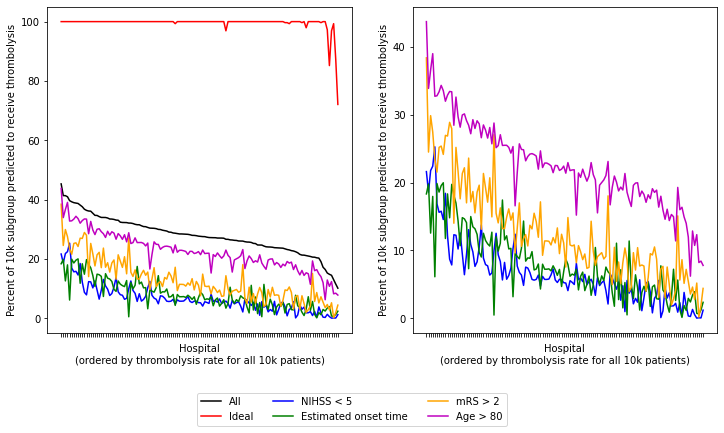

In [33]:
df_sorted_results = df_results.sort_values('All patients', ascending=False)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.plot(df_sorted_results['All patients'], label='All', c='k')
ax1.plot(df_sorted_results['Ideal'], label='Ideal', c='r')
ax1.plot(df_sorted_results['NIHSS < 5'], label='NIHSS < 5', c='b')
ax1.plot(df_sorted_results['Estimated onset time'], 
         label='Estimated onset time', c='g')
ax1.plot(df_sorted_results['mRS > 2'], label='mRS > 2', c='orange')
ax1.plot(df_sorted_results['Age > 80'], label='Age > 80', c='m')
ax1.set_xticklabels([])
ax1.set_xlabel('Hospital\n(ordered by thrombolysis rate for all 10k patients)')
ax1.set_ylabel('Percent of 10k subgroup predicted to receive thrombolysis')
ax1.legend(loc='lower center', ncol=3, bbox_to_anchor=(1, -0.3))

ax2 = fig.add_subplot(122)
ax2.plot(df_sorted_results['NIHSS < 5'], label='NIHSS < 5', c='b')
ax2.plot(df_sorted_results['Estimated onset time'], 
         label='Estimated onset time', c='g')
ax2.plot(df_sorted_results['mRS > 2'], label='mRS > 2', c='orange')
ax2.plot(df_sorted_results['Age > 80'], label='Age > 80', c='m')
ax2.set_xticklabels([])
ax2.set_xlabel('Hospital\n(ordered by thrombolysis rate for all 10k patients)')
ax2.set_ylabel('Percent of 10k subgroup predicted to receive thrombolysis')

plt.savefig(f'./output/{notebook}_{model_text}_selected_subgroups.jpg', dpi=300, 
            bbox_inches='tight')

plt.show()

Plot data for all patient subgroups (all patients, ideal candidate for thrombolysis, and all nine individual features)

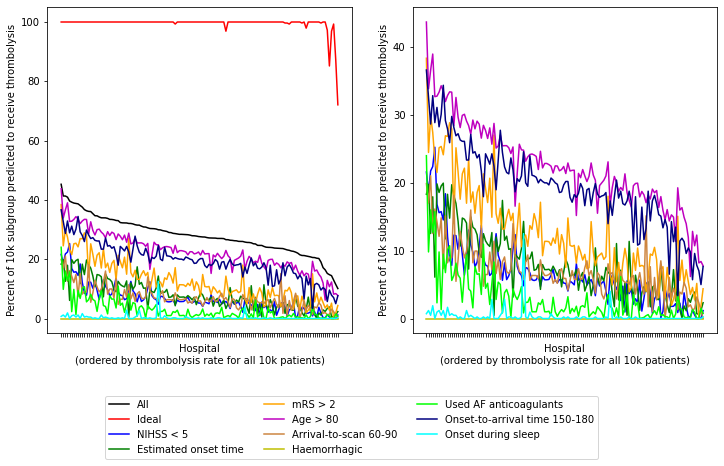

In [34]:
df_sorted_results = df_results.sort_values('All patients', ascending=False)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.plot(df_sorted_results['All patients'], label='All', c='k')
ax1.plot(df_sorted_results['Ideal'], label='Ideal', c='r')
ax1.plot(df_sorted_results['NIHSS < 5'], label='NIHSS < 5', c='b')
ax1.plot(df_sorted_results['Estimated onset time'], 
         label='Estimated onset time', c='g')
ax1.plot(df_sorted_results['mRS > 2'], label='mRS > 2', c='orange')
ax1.plot(df_sorted_results['Age > 80'], label='Age > 80', c='m')
ax1.plot(df_sorted_results['Arrival-to-scan 60-90'], 
         label='Arrival-to-scan 60-90', c='peru')
ax1.plot(df_sorted_results['Haemorrhagic'], label='Haemorrhagic', c='y')
ax1.plot(df_sorted_results['Used AF anticoagulants'], 
         label='Used AF anticoagulants', c='lime')
ax1.plot(df_sorted_results['Onset-to-arrival time 150-180'], 
         label='Onset-to-arrival time 150-180', c='navy')
ax1.plot(df_sorted_results['Onset during sleep'],
         label='Onset during sleep', c='aqua')
ax1.legend(loc='lower center', ncol=3, bbox_to_anchor=(1, -0.4))

ax1.set_xticklabels([])
ax1.set_xlabel('Hospital\n(ordered by thrombolysis rate for all 10k patients)')
ax1.set_ylabel('Percent of 10k subgroup predicted to receive thrombolysis')

ax2 = fig.add_subplot(122)
ax2.plot(df_sorted_results['NIHSS < 5'], label='NIHSS < 5', c='b')
ax2.plot(df_sorted_results['Estimated onset time'], 
         label='Estimated onset time', c='g')
ax2.plot(df_sorted_results['mRS > 2'], label='mRS > 2', c='orange')
ax2.plot(df_sorted_results['Age > 80'], label='Age > 80', c='m')
ax2.plot(df_sorted_results['Arrival-to-scan 60-90'], 
         label='Arrival-to-scan 60-90', c='peru')
ax2.plot(df_sorted_results['Haemorrhagic'], label='Haemorrhagic', c='y')
ax2.plot(df_sorted_results['Used AF anticoagulants'], 
         label='Used AF anticoagulants', c='lime')
ax2.plot(df_sorted_results['Onset-to-arrival time 150-180'], 
         label='Onset-to-arrival time 150-180', c='navy')
ax2.plot(df_sorted_results['Onset during sleep'], 
         label='Onset during sleep', c='aqua')
ax2.set_xticklabels([])
ax2.set_xlabel('Hospital\n(ordered by thrombolysis rate for all 10k patients)')
ax2.set_ylabel('Percent of 10k subgroup predicted to receive thrombolysis')

plt.savefig(f'./output/{notebook}_{model_text}_all_subgroups.jpg', 
            dpi=300, bbox_inches='tight')

plt.show()

Plot observations.

* The observed data for the patient subgroup *Onset during sleep* shows a 3% thrombolysis rate (compared to 30% thrombolysis rate for all patients arriving within 4 hours).
* The SHAP value for *onset during sleep* is comparable to anticoagulant use, so we're surprised to see *onset during sleep* to flat line in these graphs (aqua), whereas anticoagulants drops slowly like the others (but on a lower level).
* Patient subgroup *haemorrhagic* shows 0% thrombolysis rate or all hospitals, as expected.
* Onset-to-arrival: The RHS of each plot contains the hospitals that give thromboylsis to all patients the least, so hospitals are choosing to not give thrombolysis to more patients, however the *onset-to-arrival* subgroup have a higher thrombolysis rate than expect. So this is not an as important feature for between hospital behaviour.

## Show a summary of results as table

In [35]:
df_results.describe().T

,count,mean,std,min,25%,50%,75%,max
All patients,132.0,27.963636,6.330286,10.100000,23.995000,27.605000,32.052500,45.270000
Ideal,132.0,99.469697,2.974083,72.068966,100.000000,100.000000,100.000000,100.000000
NIHSS < 5,132.0,6.607452,4.802008,0.000000,3.810731,5.672718,7.948478,25.280299
Estimated onset time,132.0,7.915853,5.047863,0.106129,4.119130,7.123906,10.984346,19.978774
mRS > 2,132.0,12.598246,7.096859,0.147929,7.692308,10.798817,16.161243,38.412229
Age > 80,132.0,22.466330,6.523119,6.193853,18.575650,21.938534,25.933806,43.758865
Arrival-to-scan 60-90,132.0,7.067428,3.881265,0.000000,5.303030,6.349206,8.405483,21.067821
Haemorrhagic,132.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Used AF anticoagulants,132.0,3.047819,3.723689,0.000000,0.660611,1.610239,3.860446,24.029727
Onset-to-arrival time 150-180,132.0,19.450893,6.224218,3.370787,16.726251,19.356486,23.416752,36.670072


## Show a summary of results as violin plot
Each violin represents the range of predicted thrombolysis rate across the 132 hosptials for a patient subgroup (selected from the 10k patient cohort)

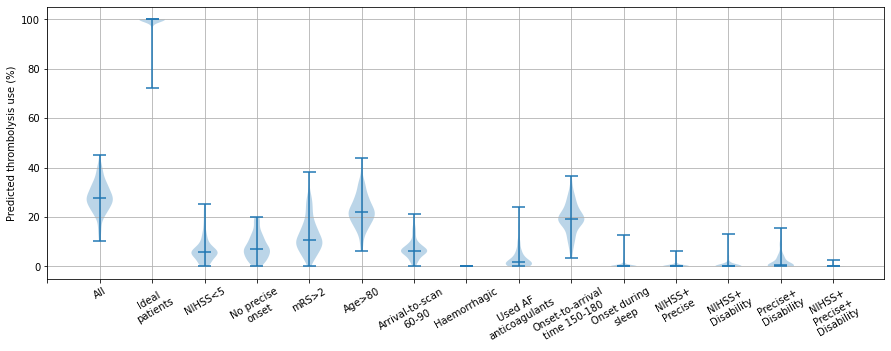

In [37]:
cols = ['All patients', 'Ideal', 'NIHSS < 5', 'Estimated onset time', 'mRS > 2', 
        'Age > 80', 'Arrival-to-scan 60-90', 'Haemorrhagic', 
        'Used AF anticoagulants', 'Onset-to-arrival time 150-180', 
        'Onset during sleep', 'NIHSS + Precise', 'NIHSS + Disability', 
        'Precise + Disability', 'NIHSS + Precise + Disability']


labels = ['', 'All', 'Ideal\npatients', 'NIHSS<5', 'No precise\nonset', 'mRS>2',
          'Age>80', 'Arrival-to-scan\n60-90', 'Haemorrhagic', 
          'Used AF\nanticoagulants', 'Onset-to-arrival\ntime 150-180', 
          'Onset during\nsleep','NIHSS+\nPrecise', 'NIHSS+\nDisability', 
          'Precise+\nDisability', 'NIHSS+\nPrecise+\nDisability']

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
ax.violinplot(df_results[cols], showmedians=True)
ax.set_ylabel('Predicted thrombolysis use (%)')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30)
ax.grid()
plt.savefig(f'./output/{notebook}_{model_text}'
            '_subgroup_violin_all_features.jpg', 
            dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Check correlations between pairs of patient subgroups (from the 10k cohort)

In [38]:
features = ['All patients', 'NIHSS < 5', 'Estimated onset time', 'mRS > 2',
            'Age > 80', 'Arrival-to-scan 60-90', 'Haemorrhagic', 
            'Used AF anticoagulants', 'Onset-to-arrival time 150-180',
            'Onset during sleep']

for feat1 in features:
    for feat2 in features[features.index(feat1)+1:]:
        try:
            slope, intercept, r_value, p_value, std_err = \
                stats.linregress(df_results[feat1],df_results[feat2])
            print (f'Correlation between {feat1} and {feat2}:'
                f'\n  r-squared = {r_value**2:0.3f}, p = {p_value:0.3f}\n')
        except:
            print ('Correlation cannot be calulated)')

Correlation between All patients and NIHSS < 5:
  r-squared = 0.766, p = 0.000

Correlation between All patients and Estimated onset time:
  r-squared = 0.679, p = 0.000

Correlation between All patients and mRS > 2:
  r-squared = 0.774, p = 0.000

Correlation between All patients and Age > 80:
  r-squared = 0.927, p = 0.000

Correlation between All patients and Arrival-to-scan 60-90:
  r-squared = 0.617, p = 0.000

Correlation between All patients and Haemorrhagic:
  r-squared = 0.000, p = 1.000

Correlation between All patients and Used AF anticoagulants:
  r-squared = 0.515, p = 0.000

Correlation between All patients and Onset-to-arrival time 150-180:
  r-squared = 0.886, p = 0.000

Correlation between All patients and Onset during sleep:
  r-squared = 0.036, p = 0.029

Correlation between NIHSS < 5 and Estimated onset time:
  r-squared = 0.445, p = 0.000

Correlation between NIHSS < 5 and mRS > 2:
  r-squared = 0.621, p = 0.000

Correlation between NIHSS < 5 and Age > 80:
  r-squa

## Save results

In [39]:
df_results.to_csv(f'./output/{notebook}_{model_text}_groups.csv', index=True)

## Additional analysis: Why don't many patients in the subgroup "onset during sleep" get thrombolysis?

Check whether the patients that have onset during sleep also have an estimated onset time.

See whether it is the combination that if have onset during sleep then also have estimated onset time, and so the combination of both SHAPs gives minimal chance to have thrombolysis.

In [40]:
# Onset during sleep
mask = test['Onset during sleep'] == 1

print(f'Percent of patients with onset in sleep that have precise onset time: '
      f'{(test["Precise onset time"][mask].mean(axis=0)/test.shape[0])*100}%')

Percent of patients with onset in sleep that have precise onset time: 0.0%


### Plot waterfall plots
Using the model fitted on the 10k cohort data (from notebook 04), calculate the SHAP values

In [41]:
# Read XGBoost model fitted on the 10k cohort train/test dataset (04)
filename_model = (f'./saved_models/04_{model_text}.p')

# Load model interaction
with open(filename_model, 'rb') as filehandler:
    model = pickle.load(filehandler)

# Set up explainer using the model and feature values from training set
explainer = shap.TreeExplainer(model, X_train)
shap_values_extended = explainer(X_test)

 99%|===================| 9927/10000 [00:14<00:00]        

Let's see a waterfall plot for a few of these patients. 

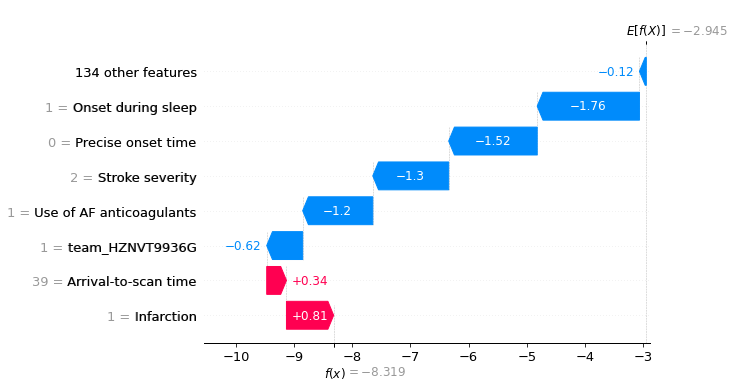

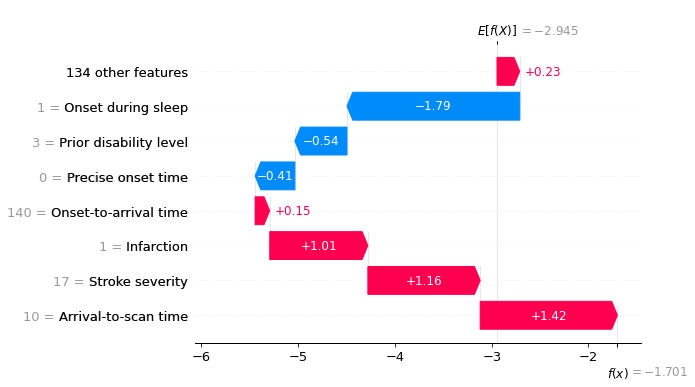

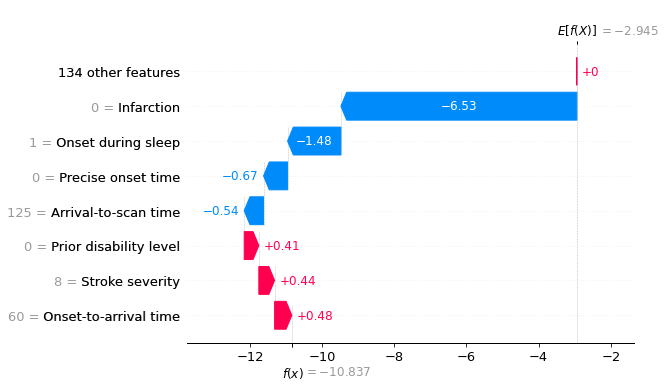

In [42]:
for i in range(3):
    location_onset_during_sleep = (
                            np.where(test['Onset during sleep'] == 1)[0][i])

    fig = waterfall.waterfall(shap_values_extended[location_onset_during_sleep], 
                              show=False, max_display=8, 
                              y_reverse=True, rank_absolute=False)
    plt.savefig(f'output/{notebook}_{model_text}'
                f'_waterfall_onset_during_sleep_{i}.jpg', 
                dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()